<a href="https://colab.research.google.com/github/jumbokh/ML-Class/blob/main/kaggle_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

　Ｆrom kaggle, Machine Learning Tutorial for Beginners

## PRINCIPLE COMPONENT ANALYSIS (PCA)
* Fundemental dimension reduction technique
* first step is decorrelation:
    * rotates data samples to be aligned with axes
    * shifts data asmples so they have mean zero
    * no information lost
    * fit() : learn how to shift samples
    * transform(): apply the learned transformation. 
      It can also be applies test data
* Resulting PCA features are not linearly correlated
* Principle components: directions of variance

In [3]:
import numpy as np
import pandas as pd
data = pd.read_csv('column_2C_weka.csv')
data3 = data.drop('class',axis = 1)

### PCA

In [4]:

from sklearn.decomposition import PCA
model = PCA()
model.fit(data3)
transformed = model.transform(data3)
print('Principle components: ',model.components_)

Principle components:  [[ 3.23645647e-01  1.13192291e-01  3.03674740e-01  2.10453357e-01
  -2.99598300e-02  8.63153779e-01]
 [-4.76634849e-01 -9.85632787e-02 -5.32783979e-01 -3.78071570e-01
   3.21809199e-01  4.82438036e-01]
 [-1.54481282e-03 -2.64657410e-01 -4.96541893e-01  2.63112598e-01
  -7.74612852e-01  1.18940778e-01]
 [ 3.73677251e-01  7.54113757e-01 -3.39411757e-01 -3.80436506e-01
  -1.75106042e-01 -3.29143086e-02]
 [-4.41703869e-01  7.35414748e-02  5.12024113e-01 -5.15245344e-01
  -5.14639730e-01  8.35992525e-02]
 [ 5.77350269e-01 -5.77350269e-01 -1.08931753e-11 -5.77350269e-01
  -3.59057228e-12  3.06721315e-12]]


### PCA variance

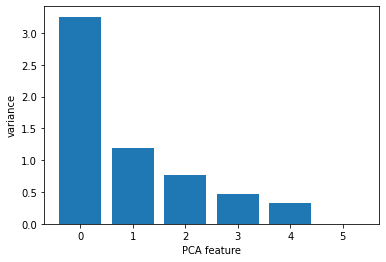

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(data3)

plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

* Second step: intrinsic dimension: number of feature needed to approximate the data essential idea behind dimension reduction
* PCA identifies intrinsic dimension when samples have any number of features
* intrinsic dimension = number of PCA feature with significant variance
* In order to choose intrinsic dimension try all of them and find best accuracy
* Also check intuitive way of PCA with this example: https://www.kaggle.com/kanncaa1/tutorial-pca-intuition-and-image-completion

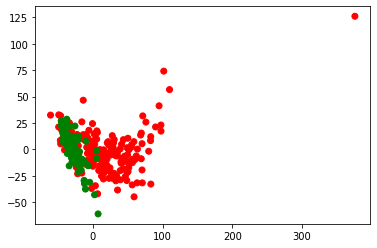

In [9]:
# apply PCA
color_list = ['red' if i=='Abnormal' else 'green' for i in data.loc[:,'class']]
pca = PCA(n_components = 2)
pca.fit(data3)
transformed = pca.transform(data3)
x = transformed[:,0]
y = transformed[:,1]
plt.scatter(x,y,c = color_list)
plt.show()